# What sells a car?



**description**

In This project we deal with advertisements for vehicles with additional info regarding the vehicle.

The purpose of our analysis is to see whas sells a car, by determining which factors influence the price of a vehicle.

We are set to deal with a date frame containing a veriety of info types. 
After cleanin and suiting the dataset to our needs we are going to formulate questions regarding the data and offer 
visual repressentations of our points of interest. 


## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Load data

In [2]:
# Load the data file into a DataFrame
data=pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [3]:
# print the general/summary information about the DataFrame

data.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Regarding the dataset:**

-The data contains missing values in a couple of columns.

-The column[odometer] has to be renamed for the sake of convinience.

-The column[condition] has to be replaced with a numeric scale.

-we need to change the data types of some columns.

    we need new columns in the dataset:
-Create a new column of the day of the week, month, and year the ad was placed.

-Create a new column the vehicle's age (in years) when the ad was placed.

-Create a new column the vehicle's average mileage per year.

renaming columns:

In [5]:
data = data.rename(columns={'odometer':'mileage'})

In [6]:
data.replace(['nan'], ['NaN'])

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


Changing column value type:

In [7]:
data['is_4wd'] = data['is_4wd'].replace(np.nan, 0)

In [8]:
data['is_4wd'] = data['is_4wd'].astype('int')

In [9]:
data['is_4wd'] = data['is_4wd'].astype('bool')

In [10]:
data['is_4wd'].unique()

array([ True, False])

replacing the column[condition] with a numeric scale:

In [11]:
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [12]:
condition_dict={'excellent':5,'like new':4,'new':3,'good':2,'fair':1,'salvage':0}

In [13]:

def replace_condition(x):
    return condition_dict[x]


In [14]:
data['vehicle_condition'] = data['condition'].apply(replace_condition)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         47906 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  object 
 4   cylinders          46265 non-null  float64
 5   fuel               51525 non-null  object 
 6   mileage            43633 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   paint_color        42258 non-null  object 
 10  is_4wd             51525 non-null  bool   
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  vehicle_condition  51525 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 5.2+ MB


### Conclusions and further steps

There still are missing values in some columns.

We intend to treat each column seperatly.
forthermore, we plan on adding more columns to make our analysis easier and better.

## Treat missing values (if any)

**Missing values in model_year:**

In [16]:
# data['model_year']= data['model_year'].replace(['   nan'],'NaN')

In [17]:
data['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [18]:
grouped_data=data.groupby(['model'])['model_year'].median()
grouped_data

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

In [19]:
data['model_year_full'] = data['model_year']

grouped_data_dict=pd.Series(grouped_data).to_dict()

grouped_data_dict

{'acura tl': 2007.0,
 'bmw x5': 2010.0,
 'buick enclave': 2012.0,
 'cadillac escalade': 2009.0,
 'chevrolet camaro': 2013.0,
 'chevrolet camaro lt coupe 2d': 2017.0,
 'chevrolet colorado': 2015.0,
 'chevrolet corvette': 2000.0,
 'chevrolet cruze': 2014.0,
 'chevrolet equinox': 2013.0,
 'chevrolet impala': 2010.0,
 'chevrolet malibu': 2012.0,
 'chevrolet silverado': 2008.0,
 'chevrolet silverado 1500': 2011.0,
 'chevrolet silverado 1500 crew': 2016.0,
 'chevrolet silverado 2500hd': 2010.0,
 'chevrolet silverado 3500hd': 2013.0,
 'chevrolet suburban': 2008.0,
 'chevrolet tahoe': 2009.0,
 'chevrolet trailblazer': 2005.0,
 'chevrolet traverse': 2012.0,
 'chrysler 200': 2014.0,
 'chrysler 300': 2012.0,
 'chrysler town & country': 2010.5,
 'dodge charger': 2013.0,
 'dodge dakota': 2004.0,
 'dodge grand caravan': 2012.0,
 'ford econoline': 2011.0,
 'ford edge': 2013.0,
 'ford escape': 2012.0,
 'ford expedition': 2007.0,
 'ford explorer': 2011.0,
 'ford f-150': 2011.0,
 'ford f-250': 2005.0,
 

In [20]:
data[data['model_year_full'].isna()]

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_condition,model_year_full
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2,NaN
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,True,2018-08-05,28,5,NaN
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,False,2018-09-23,15,5,NaN
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,True,2019-02-20,39,4,NaN
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,True,2018-08-07,60,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,True,2018-11-28,24,2,NaN
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,True,2019-04-18,13,5,NaN
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,True,2018-09-18,56,1,NaN
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,True,2018-12-27,37,5,NaN


In [21]:
#data['model_year_full'] = data['model_year_full'].fillna(data.groupby('model')['model_year'].transform('mean'))
data['model_year_full']=data['model_year_full'].fillna(data.model.map(grouped_data_dict))

In [22]:
data['model_year_full'] = np.ceil(data['model_year_full'])


In [23]:
data['model_year_full'].value_counts().sum()

51525

**Missing values in mileage:**

In [24]:
data['mileage_full'] = data['mileage']

In [25]:
data['mileage_full'] = data['mileage_full'].fillna(data.groupby(['model_year_full','vehicle_condition'])['mileage'].transform('mean'))

In [26]:
data['mileage_full'].unique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

In [27]:
data['mileage_full'].value_counts().sum()

51518

In [28]:
data['cylinders_full'] = data['cylinders']
#data['model_year'] = data['model_year'].astype('int')

In [29]:
data['cylinders_full'] = data['cylinders_full'].fillna(data.groupby(['model','model_year_full'])['cylinders'].transform('median'))

In [30]:
data['cylinders_full'].value_counts().sum()

51499

In [31]:
data['cylinders_full'] = np.ceil(data['cylinders_full'])

#data['cylinders_full'] = data['cylinders_full'].astype('int')

In [32]:
data['cylinders_full'].unique()


array([ 6.,  4.,  8.,  5., 10.,  7., nan,  3., 12.,  9.])

In [33]:
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_condition,model_year_full,mileage_full,cylinders_full
15046,8900,2011.0,honda cr-v,excellent,4.0,gas,117000.0,automatic,SUV,brown,True,2018-05-08,29,5,2011.0,117000.000000,4.0
37159,1950,2003.0,toyota camry le,good,4.0,gas,230068.0,automatic,sedan,blue,False,2018-09-28,70,2,2003.0,230068.000000,4.0
37593,3850,2001.0,jeep grand cherokee,excellent,6.0,gas,183460.0,automatic,SUV,NaN,True,2018-07-22,25,5,2001.0,183460.000000,6.0
12229,9495,2013.0,chevrolet equinox,excellent,4.0,gas,93505.0,automatic,SUV,grey,False,2019-02-16,15,5,2013.0,93505.000000,4.0
11125,8950,2018.0,chevrolet cruze,good,4.0,gas,17000.0,automatic,sedan,NaN,False,2018-11-10,43,2,2018.0,17000.000000,4.0
11741,1,2018.0,gmc acadia,excellent,10.0,gas,26152.0,other,SUV,custom,True,2018-06-05,61,5,2018.0,26152.000000,10.0
41005,8800,2006.0,chevrolet silverado,good,8.0,gas,130000.0,automatic,truck,red,True,2018-06-24,59,2,2006.0,130000.000000,8.0
44258,7995,2007.0,ford ranger,excellent,6.0,gas,NaN,automatic,truck,NaN,True,2018-06-10,36,5,2007.0,135284.564815,6.0
29044,19500,2012.0,toyota tacoma,good,6.0,gas,118000.0,automatic,truck,black,True,2018-06-12,41,2,2012.0,118000.000000,6.0
35749,27995,2018.0,chevrolet silverado 1500,excellent,8.0,gas,60000.0,automatic,pickup,red,True,2019-01-20,44,5,2018.0,60000.000000,8.0


In [34]:
data['paint_color'] = data['paint_color'].fillna('unknown')

## Fix data types

In [35]:
data['date_posted'] = pd.to_datetime(data['date_posted'])

#data['date_posted'] = data['date_posted'].astype('str')

In [36]:
data['model_year_full'] = data['model_year_full'].astype('int')


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         47906 non-null  float64       
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          46265 non-null  float64       
 5   fuel               51525 non-null  object        
 6   mileage            43633 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  vehicle_condition  51525 non-null  int64         
 14  model_

In [38]:
data = pd.DataFrame(data)

**After we cleaned all the data and made it eisier to work with we can continue to on adding new columns**

## Enrich data

**we need new columns in the dataset, we will continue with the following order :**

-Create a new columns of the day of the week and of the  month, and year the ad was placed.

-Create a new column the vehicle's age (in years) when the ad was placed.

-Create a new column the vehicle's average mileage per year.

In [39]:
# Add datetime values for when the ad was placed

data['date_posted'] = pd.to_datetime(data['date_posted'])


data['year'] = pd.to_datetime(data['date_posted']).dt.year
data['month'] = pd.to_datetime(data['date_posted']).dt.month

data['date_of_ad'] = data['month'].astype(str) + '-'+ data['year'].astype(str)


#data['date_of_ad'] = pd.to_datetime(data['date_of_ad'])

#data['date_of_ad'] = data['date_of_ad'].data.strftime('%m/%Y')


data['weekday_of_posting_ad'] = pd.to_datetime(data['date_posted']).dt.weekday

In [40]:
weekday_dict={0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturady'}

def replace_weekday(x):
    return weekday_dict[x]

data['weekday_of_posting'] = data['weekday_of_posting_ad'].apply(replace_weekday)

**Now, we have seperated weekday column and a seperated mounth and year column for our analysis**

In [41]:
# Add the vehicle's age when the ad was placed

data['vehicle_age'] = data['year'] - data['model_year_full']

data['vehicle_age'] = data['vehicle_age'].replace(0,1)

data['vehicle_age'].unique()

array([  7,   6,  16,   2,   4,   3,  11,   1,  10,   5,   8,   9,  15,
        14,  13,  17,  12,  53,  24,  18,  19,  26,  22,  38,  20,  23,
        44,  21,  25,  33,  42,  31,  43,  29,  28,  46,  52,  49,  30,
        40,  54,  39,  50,  27,  32,  55,  37,  56,  34,  45,  41,  51,
        63,  47,  48,  36,  35,  65,  57,  71,  58,  59, 110,  82,  69,
        60,  89])

In [42]:
data['mileage_per_year'] = np.nan


In [43]:
# Add the vehicle's average mileage per year

data['mileage_per_year'] = data['mileage_full'] / data['vehicle_age']

data['mileage_per_year'] = np.ceil(data['mileage_per_year'])

In [44]:
data['vehicle_age'] = data['vehicle_age'].astype('int')


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   price                  51525 non-null  int64         
 1   model_year             47906 non-null  float64       
 2   model                  51525 non-null  object        
 3   condition              51525 non-null  object        
 4   cylinders              46265 non-null  float64       
 5   fuel                   51525 non-null  object        
 6   mileage                43633 non-null  float64       
 7   transmission           51525 non-null  object        
 8   type                   51525 non-null  object        
 9   paint_color            51525 non-null  object        
 10  is_4wd                 51525 non-null  bool          
 11  date_posted            51525 non-null  datetime64[ns]
 12  days_listed            51525 non-null  int64         
 13  v

## Check clean data

this is the final data frame we are left with for now

In [46]:
data.describe()

,price,model_year,cylinders,mileage,days_listed,vehicle_condition,model_year_full,mileage_full,cylinders_full,year,month,weekday_of_posting_ad,vehicle_age,mileage_per_year
count,51525.000000,47906.000000,46265.000000,43633.000000,51525.00000,51525.000000,51525.000000,51518.000000,51499.000000,51525.000000,51525.000000,51525.000000,51525.000000,51518.000000
mean,12132.464920,2009.750470,6.125235,115553.461738,39.55476,3.593576,2009.794352,115544.412365,6.119963,2018.307462,6.628491,3.005434,8.554876,17870.670193
std,10040.803015,6.282065,1.660360,65094.611341,28.20427,1.482816,6.099244,62004.774202,1.657044,0.461447,3.474134,1.997759,6.057705,12571.254650
min,1.000000,1908.000000,3.000000,0.000000,0.00000,0.000000,1908.000000,0.000000,3.000000,2018.000000,1.000000,0.000000,1.000000,0.000000
25%,5000.000000,2006.000000,4.000000,70000.000000,19.00000,2.000000,2007.000000,73179.000000,4.000000,2018.000000,3.000000,1.000000,4.000000,10903.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,33.00000,4.000000,2011.000000,114604.500000,6.000000,2018.000000,7.000000,3.000000,7.000000,15236.000000
75%,16839.000000,2014.000000,8.000000,155000.000000,53.00000,5.000000,2014.000000,152381.000000,8.000000,2019.000000,10.000000,5.000000,12.000000,21500.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,5.000000,2019.000000,990000.000000,12.000000,2019.000000,12.000000,6.000000,110.000000,373200.000000


In [47]:
print(data.isnull().sum()/len(data))

price                    0.000000
model_year               0.070238
model                    0.000000
condition                0.000000
cylinders                0.102086
fuel                     0.000000
mileage                  0.153168
transmission             0.000000
type                     0.000000
paint_color              0.000000
is_4wd                   0.000000
date_posted              0.000000
days_listed              0.000000
vehicle_condition        0.000000
model_year_full          0.000000
mileage_full             0.000136
cylinders_full           0.000505
year                     0.000000
month                    0.000000
date_of_ad               0.000000
weekday_of_posting_ad    0.000000
weekday_of_posting       0.000000
vehicle_age              0.000000
mileage_per_year         0.000136
dtype: float64


**As we see here, not counting the [mileage] column, the percentage of missing values we deal with is less than 10% at most.**

- Taking the low percentage in concideration i choose to drop the missing values in order to have a cleaner data frame

In [48]:
#New data frame without the columns we dont need

data_clean = data.loc[:, data.columns.drop(['model_year','cylinders','mileage','condition','weekday_of_posting_ad','year','month'])]

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model               51525 non-null  object        
 2   fuel                51525 non-null  object        
 3   transmission        51525 non-null  object        
 4   type                51525 non-null  object        
 5   paint_color         51525 non-null  object        
 6   is_4wd              51525 non-null  bool          
 7   date_posted         51525 non-null  datetime64[ns]
 8   days_listed         51525 non-null  int64         
 9   vehicle_condition   51525 non-null  int64         
 10  model_year_full     51525 non-null  int64         
 11  mileage_full        51518 non-null  float64       
 12  cylinders_full      51499 non-null  float64       
 13  date_of_ad          51525 non-null  object    

In [49]:
data_clean = data_clean.dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51492 non-null  int64         
 1   model               51492 non-null  object        
 2   fuel                51492 non-null  object        
 3   transmission        51492 non-null  object        
 4   type                51492 non-null  object        
 5   paint_color         51492 non-null  object        
 6   is_4wd              51492 non-null  bool          
 7   date_posted         51492 non-null  datetime64[ns]
 8   days_listed         51492 non-null  int64         
 9   vehicle_condition   51492 non-null  int64         
 10  model_year_full     51492 non-null  int64         
 11  mileage_full        51492 non-null  float64       
 12  cylinders_full      51492 non-null  float64       
 13  date_of_ad          51492 non-null  object    

 after dropping the missing values we left with a full data frame and now we can begin our EDA procedure 

In [50]:
# print the general/summary information about the DataFrame

data_clean.describe(include='all',datetime_is_numeric=True)

,price,model,fuel,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_condition,model_year_full,mileage_full,cylinders_full,date_of_ad,weekday_of_posting,vehicle_age,mileage_per_year
count,51492.000000,51492,51492,51492,51492,51492,51492,51492,51492.000000,51492.000000,51492.000000,51492.000000,51492.000000,51492,51492,51492.000000,51492.000000
unique,NaN,100,5,3,13,13,2,NaN,NaN,NaN,NaN,NaN,NaN,12,7,NaN,NaN
top,NaN,ford f-150,gas,automatic,SUV,white,False,NaN,NaN,NaN,NaN,NaN,NaN,10-2018,wednesday,NaN,NaN
freq,NaN,2793,47258,46881,12400,10024,25929,NaN,NaN,NaN,NaN,NaN,NaN,4640,7507,NaN,NaN
mean,12131.759710,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-25 01:38:59.874155008,39.553445,3.593898,2009.811582,115538.967788,6.119747,NaN,NaN,8.537617,17876.115901
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,0.000000,0.000000,1908.000000,0.000000,3.000000,NaN,NaN,1.000000,0.000000
25%,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-29 00:00:00,19.000000,2.000000,2007.000000,73179.000000,4.000000,NaN,NaN,4.000000,10910.000000
50%,9000.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-25 00:00:00,33.000000,4.000000,2011.000000,114587.000000,6.000000,NaN,NaN,7.000000,15243.000000
75%,16847.000000,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-21 00:00:00,53.000000,5.000000,2014.000000,152381.000000,8.000000,NaN,NaN,12.000000,21500.000000
max,375000.000000,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,271.000000,5.000000,2019.000000,990000.000000,12.000000,NaN,NaN,110.000000,373200.000000


In [51]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51492 non-null  int64         
 1   model               51492 non-null  object        
 2   fuel                51492 non-null  object        
 3   transmission        51492 non-null  object        
 4   type                51492 non-null  object        
 5   paint_color         51492 non-null  object        
 6   is_4wd              51492 non-null  bool          
 7   date_posted         51492 non-null  datetime64[ns]
 8   days_listed         51492 non-null  int64         
 9   vehicle_condition   51492 non-null  int64         
 10  model_year_full     51492 non-null  int64         
 11  mileage_full        51492 non-null  float64       
 12  cylinders_full      51492 non-null  float64       
 13  date_of_ad          51492 non-null  object    

In [52]:
# print a sample of data

data_clean.sample(10)

,price,model,fuel,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_condition,model_year_full,mileage_full,cylinders_full,date_of_ad,weekday_of_posting,vehicle_age,mileage_per_year
15762,18995,chevrolet corvette,gas,automatic,coupe,blue,False,2018-05-25,19,4,1982,19053.000000,8.0,5-2018,thursday,36,530.0
38430,14588,chevrolet cruze,gas,automatic,sedan,black,False,2019-04-09,3,4,2018,23402.776053,4.0,4-2019,monday,1,23403.0
28442,5000,ford f-150,gas,automatic,truck,unknown,True,2018-10-19,45,2,2007,25000.000000,8.0,10-2018,thursday,11,2273.0
1475,3000,ford focus,gas,automatic,coupe,blue,False,2019-01-14,47,1,2012,153000.000000,4.0,1-2019,sunday,7,21858.0
40588,7650,chevrolet silverado,gas,automatic,pickup,grey,False,2018-05-14,71,5,2007,133000.000000,8.0,5-2018,sunday,11,12091.0
5048,6995,ford focus se,gas,automatic,sedan,red,False,2018-05-18,85,5,2014,85172.000000,4.0,5-2018,thursday,4,21293.0
28013,2999,ford focus se,gas,manual,hatchback,silver,False,2018-08-13,52,4,2012,136725.000000,4.0,8-2018,sunday,6,22788.0
43477,28990,ford f-350 sd,diesel,automatic,truck,unknown,True,2019-02-23,17,2,2015,112150.000000,8.0,2-2019,friday,4,28038.0
34045,5500,ram 1500,gas,automatic,pickup,white,False,2019-04-15,11,2,1996,75816.000000,8.0,4-2019,sunday,23,3297.0
49697,10200,honda cr-v,gas,automatic,SUV,black,True,2018-06-19,3,5,2010,124546.913435,4.0,6-2018,monday,8,15569.0


## Study core parameters

The parameters are
- Price
- vehicle_age
- mileage_full
- vehicle_condition
- cylinders_full

In [53]:
def distributions(parameter):
    print('A histogram of: {}'.format(parameter))
    print('')
    sns.histplot(data=data_clean,x=parameter)
    if data[parameter].median()<data[parameter].mean():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    
    ninety_eight = np.percentile(data[parameter], 98)
    two = np.percentile(data[parameter], 2)
    print('---------------------------------------')
    print('min border:',two)
    print('max border:',ninety_eight)
    print('---------------------------------------')
    print('The outliers are considered to be values below',two, "and above",ninety_eight)
    print('We have',len(data[(data[parameter]<two)|(data[parameter]>ninety_eight)]),"values that we can consider outliers")


#sns.histplot(data=data_clean, x='price')

A histogram of: price

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 371.48
max border: 37995.0
---------------------------------------
The outliers are considered to be values below 371.48 and above 37995.0
We have 2059 values that we can consider outliers


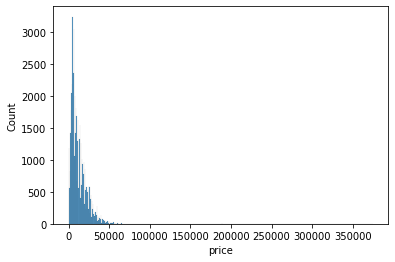

In [54]:
distributions('price')

A histogram of: vehicle_age

The distribution is skewed to the right
---------------------------------------
Statistics on: vehicle_age
count    51525.000000
mean         8.554876
std          6.057705
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
---------------------------------------
min border: 1.0
max border: 23.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 23.0
We have 887 values that we can consider outliers


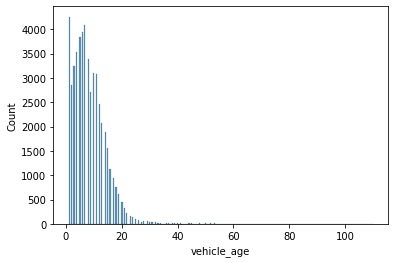

In [55]:
distributions('vehicle_age')


A histogram of: mileage_full

The distribution is skewed to the right
---------------------------------------
Statistics on: mileage_full
count     51518.000000
mean     115544.412365
std       62004.774202
min           0.000000
25%       73179.000000
50%      114604.500000
75%      152381.000000
max      990000.000000
Name: mileage_full, dtype: float64
---------------------------------------
min border: nan
max border: nan
---------------------------------------
The outliers are considered to be values below nan and above nan
We have 0 values that we can consider outliers


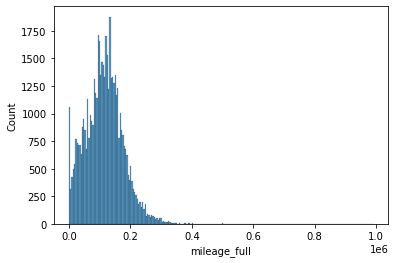

In [56]:
distributions('mileage_full')

A histogram of: vehicle_condition

The distribution is skewed to the left
---------------------------------------
Statistics on: vehicle_condition
count    51525.000000
mean         3.593576
std          1.482816
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: vehicle_condition, dtype: float64
---------------------------------------
min border: 1.0
max border: 5.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 5.0
We have 115 values that we can consider outliers


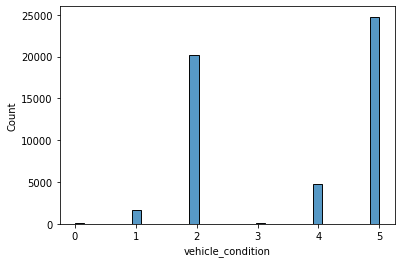

In [57]:
distributions('vehicle_condition')

A histogram of: cylinders_full

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders_full
count    51499.000000
mean         6.119963
std          1.657044
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders_full, dtype: float64
---------------------------------------
min border: nan
max border: nan
---------------------------------------
The outliers are considered to be values below nan and above nan
We have 0 values that we can consider outliers


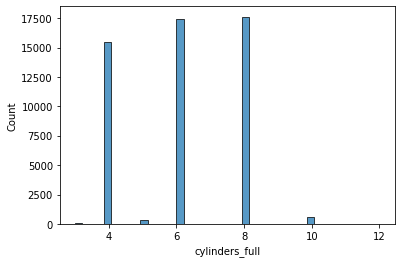

In [58]:
distributions('cylinders_full')

## Study and treat outliers

Columns that have outliers are that are of interest for us are [price],[vehicle_age] and [Mileage_full]

In [59]:
border=[]
for parameter in ['price','vehicle_age', 'mileage_full','cylinders_full','vehicle_condition']:
    ninety_eight = np.percentile(data_clean[parameter], 98)
    two = np.percentile(data_clean[parameter], 2)
    border.append([parameter,two,ninety_eight])

In [60]:
borders=pd.DataFrame(border,columns=['parameter','min','max'])
borders

,parameter,min,max
0,price,371.0,37995.0
1,vehicle_age,1.0,23.0
2,mileage_full,3915.0,250893.4
3,cylinders_full,4.0,8.0
4,vehicle_condition,1.0,5.0


In [61]:
data_clean_filtered=data_clean.copy()

In [62]:
# Store data without outliers in a separate DataFrame

for parameter in ['price','vehicle_age', 'mileage_full']:
    ninety_eight = np.percentile(data_clean_filtered[parameter], 98)
    two = np.percentile(data_clean_filtered[parameter], 2)
    data_clean_filtered=data_clean_filtered[(data_clean_filtered[parameter]>two)&(data_clean_filtered[parameter]<ninety_eight)]

In [63]:
data_clean_filtered

,price,model,fuel,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_condition,model_year_full,mileage_full,cylinders_full,date_of_ad,weekday_of_posting,vehicle_age,mileage_per_year
0,9400,bmw x5,gas,automatic,SUV,unknown,True,2018-06-23,19,2,2011,145000.000000,6.0,6-2018,friday,7,20715.0
1,25500,ford f-150,gas,automatic,pickup,white,True,2018-10-19,50,2,2011,88705.000000,6.0,10-2018,thursday,7,12673.0
2,5500,hyundai sonata,gas,automatic,sedan,red,False,2019-02-07,79,4,2013,110000.000000,4.0,2-2019,wednesday,6,18334.0
3,1500,ford f-150,gas,automatic,pickup,unknown,False,2019-03-22,9,1,2003,202621.854167,8.0,3-2019,thursday,16,12664.0
4,14900,chrysler 200,gas,automatic,sedan,black,False,2019-04-02,28,5,2017,80903.000000,4.0,4-2019,monday,2,40452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,nissan maxima,gas,automatic,sedan,black,False,2018-10-03,37,4,2013,88136.000000,6.0,10-2018,tuesday,5,17628.0
51521,2700,honda civic,gas,automatic,sedan,white,False,2018-11-14,22,0,2002,181500.000000,4.0,11-2018,tuesday,16,11344.0
51522,3950,hyundai sonata,gas,automatic,sedan,blue,False,2018-11-15,32,5,2009,128000.000000,4.0,11-2018,wednesday,9,14223.0
51523,7455,toyota corolla,gas,automatic,sedan,black,False,2018-07-02,71,2,2013,139573.000000,4.0,7-2018,sunday,5,27915.0


What were left with is a clean data without velues exceeding our set outliers and focusing on the parameters we declare as the core of our analysis we are ready to continue forward into studying them and withdrawing our foture conclution out of them.

## Study core parameters without outliers

This is the core parameters we set to work with.

Notice that there are still to seperation of outliers and graphs looks rather messy.

This in plots without the outliers:

In [64]:
def distributions_clean(parameter):
    print('A histogram of: {}'.format(parameter))
    print('')
    sns.histplot(data=data_clean,x=parameter)
    if data[parameter].median()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())

A histogram of: price

The distribution is skewed to the left
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


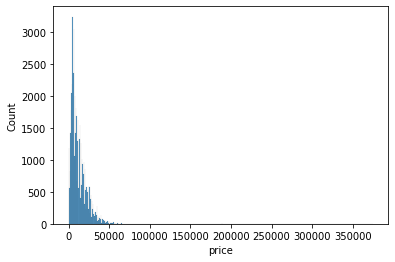

In [65]:
distributions_clean('price')

A histogram of: vehicle_age

The distribution is skewed to the left
---------------------------------------
Statistics on: vehicle_age
count    51525.000000
mean         8.554876
std          6.057705
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64


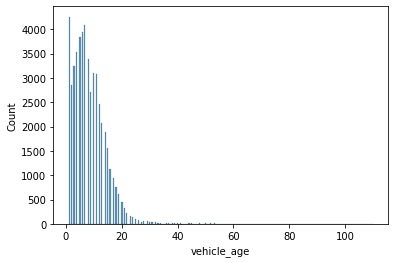

In [66]:
distributions_clean('vehicle_age')

A histogram of: mileage_full

The distribution is skewed to the left
---------------------------------------
Statistics on: mileage_full
count     51518.000000
mean     115544.412365
std       62004.774202
min           0.000000
25%       73179.000000
50%      114604.500000
75%      152381.000000
max      990000.000000
Name: mileage_full, dtype: float64


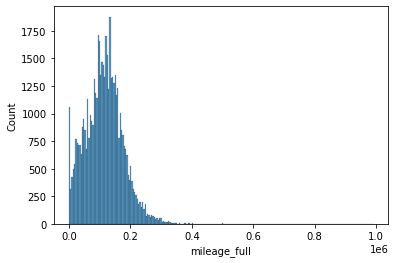

In [67]:
distributions_clean('mileage_full')

A histogram of: vehicle_condition

The distribution is skewed to the left
---------------------------------------
Statistics on: vehicle_condition
count    51525.000000
mean         3.593576
std          1.482816
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: vehicle_condition, dtype: float64


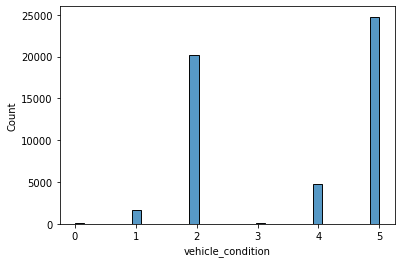

In [68]:
distributions_clean('vehicle_condition')

**What we see in this section above**

Here we see the statistics of our core parameters in the filtered data set we conducted in the previous sections
Notice that the parameters are still in their raw form and there is still some work left before we can use it 

## comparing the colums from the different data frames
    -Each plot consists of the same column but from a different data frame
    -Blue is for data with outliers and yellow is for data withut the outliers

<AxesSubplot:xlabel='price', ylabel='Count'>

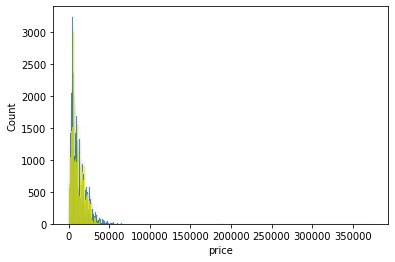

In [69]:
sns.histplot(data=data_clean,x='price')
sns.histplot(data=data_clean_filtered,x='price',color='yellow')

        - We see that the distribution is the same, skewd to the left.
        - Without outliers in the price the data seems more centered between 0 and 48000

<AxesSubplot:xlabel='mileage_full', ylabel='Count'>

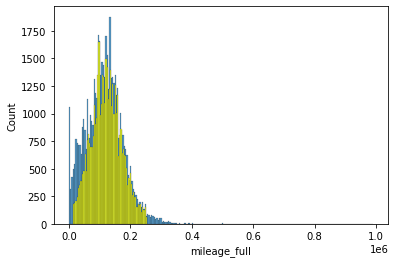

In [70]:
sns.histplot(data=data_clean,x='mileage_full')
sns.histplot(data=data_clean_filtered,x='mileage_full',color='yellow')

 - Here the distribution is different, the filtered data, in yellow, shows a normal distribution compared to the unfiltered data, in blue, that is skewd to the left and has ouliers up to 0.6 on the x axim
 
 - in the yellow histogram the borders of the outliers are visible, there are no values in zero and no values abit after 0.2 on the x axim. the number of values is lower as we can see in the y axim.  

<AxesSubplot:xlabel='vehicle_age', ylabel='Count'>

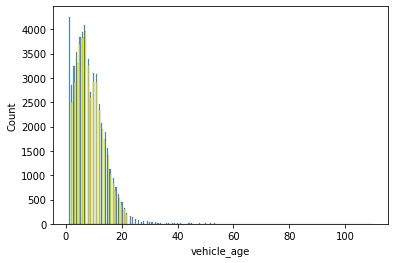

In [71]:
sns.histplot(data=data_clean,x='vehicle_age')
sns.histplot(data=data_clean_filtered,x='vehicle_age',color='yellow')

    -The filtered data has more of a normal distribution appearance and the outliers of the blue data are non-existing in 
    the filtered data

<AxesSubplot:xlabel='vehicle_condition', ylabel='Count'>

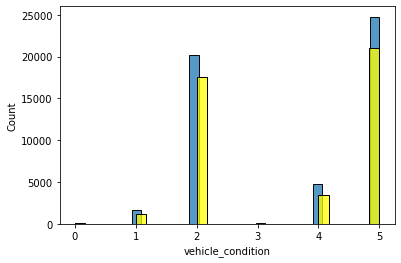

In [72]:
sns.histplot(data=data_clean,x='vehicle_condition')
sns.histplot(data=data_clean_filtered,x='vehicle_condition',color='yellow')

    -Here the value distrebuition is practically the same but with less values, as we didnt apply filtering on this colnmn specifically

<AxesSubplot:xlabel='cylinders_full', ylabel='Count'>

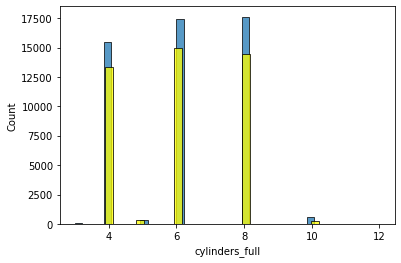

In [73]:
sns.histplot(data=data_clean,x='cylinders_full')
sns.histplot(data=data_clean_filtered,x='cylinders_full',color='yellow')

    -Here the value distrebuition is practically the same but with less values, as we didnt apply filtering on this colnmn specifically aswell.

**summary of the section above**

This section was a comparison of our filtered data with the raw version of the data in order to notice significant changes
and a visible pattern in our core parameters.  

## Ads lifetime



In [74]:
data_clean_filtered

,price,model,fuel,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_condition,model_year_full,mileage_full,cylinders_full,date_of_ad,weekday_of_posting,vehicle_age,mileage_per_year
0,9400,bmw x5,gas,automatic,SUV,unknown,True,2018-06-23,19,2,2011,145000.000000,6.0,6-2018,friday,7,20715.0
1,25500,ford f-150,gas,automatic,pickup,white,True,2018-10-19,50,2,2011,88705.000000,6.0,10-2018,thursday,7,12673.0
2,5500,hyundai sonata,gas,automatic,sedan,red,False,2019-02-07,79,4,2013,110000.000000,4.0,2-2019,wednesday,6,18334.0
3,1500,ford f-150,gas,automatic,pickup,unknown,False,2019-03-22,9,1,2003,202621.854167,8.0,3-2019,thursday,16,12664.0
4,14900,chrysler 200,gas,automatic,sedan,black,False,2019-04-02,28,5,2017,80903.000000,4.0,4-2019,monday,2,40452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,nissan maxima,gas,automatic,sedan,black,False,2018-10-03,37,4,2013,88136.000000,6.0,10-2018,tuesday,5,17628.0
51521,2700,honda civic,gas,automatic,sedan,white,False,2018-11-14,22,0,2002,181500.000000,4.0,11-2018,tuesday,16,11344.0
51522,3950,hyundai sonata,gas,automatic,sedan,blue,False,2018-11-15,32,5,2009,128000.000000,4.0,11-2018,wednesday,9,14223.0
51523,7455,toyota corolla,gas,automatic,sedan,black,False,2018-07-02,71,2,2013,139573.000000,4.0,7-2018,sunday,5,27915.0


In [75]:
data_clean_filtered.query("days_listed < 5 ")
#['is_4wd'].value_counts()

,price,model,fuel,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_condition,model_year_full,mileage_full,cylinders_full,date_of_ad,weekday_of_posting,vehicle_age,mileage_per_year
39,8000,ford f-150,gas,automatic,truck,black,True,2019-03-31,1,2,2009,234000.0,8.0,3-2019,saturady,10,23400.0
59,5200,toyota highlander,gas,automatic,SUV,green,False,2018-12-20,2,2,2006,186000.0,6.0,12-2018,wednesday,12,15500.0
75,6950,chevrolet tahoe,gas,automatic,SUV,unknown,True,2018-10-30,3,5,2005,186021.0,8.0,10-2018,monday,13,14310.0
84,4995,hyundai elantra,gas,automatic,sedan,custom,False,2018-09-15,1,4,2013,151223.0,4.0,9-2018,friday,5,30245.0
173,21100,chevrolet camaro lt coupe 2d,gas,other,coupe,red,False,2019-03-29,1,2,2017,24510.0,6.0,3-2019,thursday,2,12255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51202,22900,ram 1500,gas,automatic,truck,white,True,2019-03-28,2,5,2016,139900.0,8.0,3-2019,wednesday,3,46634.0
51297,19500,chevrolet silverado 1500,gas,automatic,truck,grey,True,2018-05-17,1,2,2011,81463.0,8.0,5-2018,wednesday,7,11638.0
51350,9999,nissan altima,gas,automatic,sedan,unknown,False,2018-07-28,3,5,2016,87379.0,4.0,7-2018,friday,2,43690.0
51359,2999,ford taurus,gas,automatic,sedan,unknown,False,2018-10-22,0,2,2004,136000.0,6.0,10-2018,sunday,14,9715.0


In [76]:
data_clean_filtered.query("days_listed > 115 ")
#['cylinders_full'].value_counts()

,price,model,fuel,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_condition,model_year_full,mileage_full,cylinders_full,date_of_ad,weekday_of_posting,vehicle_age,mileage_per_year
34,9500,toyota highlander,gas,automatic,SUV,unknown,False,2018-06-04,121,2,2008,149799.000000,6.0,6-2018,sunday,10,14980.0
51,3800,ford focus,gas,automatic,sedan,black,False,2018-11-29,261,2,2012,130323.000000,4.0,11-2018,wednesday,6,21721.0
89,18800,chevrolet camaro lt coupe 2d,gas,other,coupe,grey,False,2019-01-16,152,2,2015,33926.000000,6.0,1-2019,tuesday,4,8482.0
104,22900,ford f150 supercrew cab xlt,gas,automatic,pickup,white,True,2019-02-27,141,2,2014,73711.000000,6.0,2-2019,tuesday,5,14743.0
193,6995,ford ranger,gas,automatic,pickup,white,False,2019-03-31,130,2,2009,143803.968677,4.0,3-2019,saturady,10,14381.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51321,3500,toyota camry,gas,automatic,sedan,green,False,2018-06-07,159,5,2005,208299.000000,4.0,6-2018,wednesday,13,16023.0
51335,2900,chrysler town & country,gas,automatic,mini-van,silver,False,2018-11-09,116,5,2006,119000.000000,6.0,11-2018,thursday,12,9917.0
51368,2775,ford focus,gas,automatic,sedan,silver,False,2018-08-23,141,5,2007,111450.000000,4.0,8-2018,wednesday,11,10132.0
51489,1200,volkswagen jetta,gas,automatic,sedan,grey,False,2018-10-10,158,1,2005,185000.000000,5.0,10-2018,tuesday,13,14231.0


A histogram of: days_listed

The distribution is skewed to the right
---------------------------------------
Statistics on: days_listed
count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64
---------------------------------------
min border: 4.0
max border: 115.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 115.0
We have 1880 values that we can consider outliers


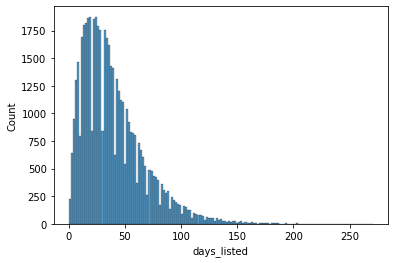

In [77]:
#ads_lifetime_values=data_clean_filtered['days_listed'].agg(['median','mean'])
data_clean_filtered['days_listed'].describe()

distributions('days_listed')

**this is the histogram chunk of the values below the min border**

<AxesSubplot:title={'center':'values below min border'}, ylabel='Frequency'>

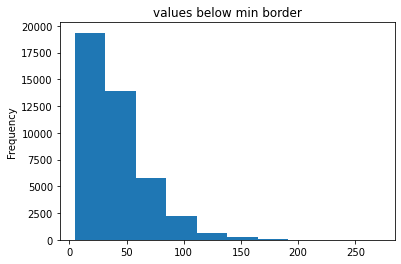

In [78]:
min_days_listed=data_clean_filtered.query("4 < days_listed")['days_listed']



min_days_listed = min_days_listed.to_frame()


min_days_listed['days_listed'].plot(kind='hist', title='values below min border')


**this is the histogram chunk of the values above the max border**

<AxesSubplot:title={'center':'values above max border'}, ylabel='Frequency'>

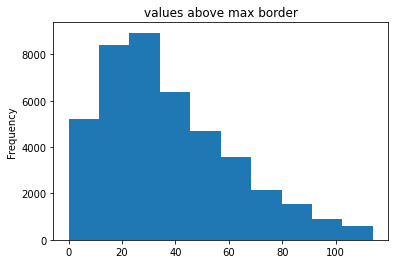

In [79]:
max_days_listed=data_clean_filtered.query("days_listed < 115")['days_listed']

max_days_listed = max_days_listed.to_frame()

max_days_listed['days_listed'].plot(kind='hist', title='values above max border')


**Summary of the section above**

**an ad is displayed for 33 days on average**

**and the majority of ads are displayed between 19 to 53 days**

    -all ads that were removed quickly were posted for less than 19 days

    -all ads that stayed for an abnormarmy longtime stayed more than 53 days


## Average price per each type of vehicle

    - In this section we we determine the average price, and range, of each vehicle type and we will specify the most 
    popular vehicle types that we have in the data.

In [80]:
price_by_type=data_clean_filtered.groupby(['type'])['price'].agg(['count','mean']).reset_index()

price_by_type

,type,count,mean
0,SUV,10735,10302.865859
1,bus,21,18107.428571
2,convertible,306,12807.303922
3,coupe,1567,12340.072750
4,hatchback,902,6504.282705
5,mini-van,1068,7467.208801
6,offroad,168,14247.005952
7,other,212,10485.919811
8,pickup,5593,14562.827999
9,sedan,10647,6603.093078


<AxesSubplot:xlabel='mean', ylabel='type'>

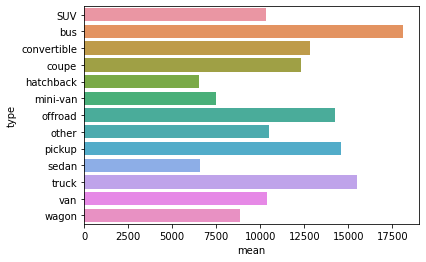

In [81]:

sns.barplot(x='mean', y='type', data=price_by_type)

**As we see here, Buses are the most expensive vehicle types in our data. second highest price per vehicle type are trucks.**

In [82]:
count_by_type=data_clean_filtered.groupby(['type'])['type'].agg(['count']).reset_index()

count_by_type

,type,count
0,SUV,10735
1,bus,21
2,convertible,306
3,coupe,1567
4,hatchback,902
5,mini-van,1068
6,offroad,168
7,other,212
8,pickup,5593
9,sedan,10647


<AxesSubplot:xlabel='count', ylabel='type'>

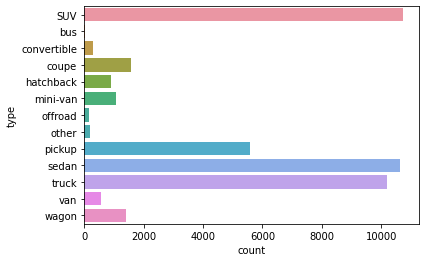

In [83]:
sns.barplot(x='count', y='type', data=count_by_type)

**This bar graph shows us that the vehicle that eppears in the most in the our data of ads are SUVs, that are followed by a sedans and trucks third**

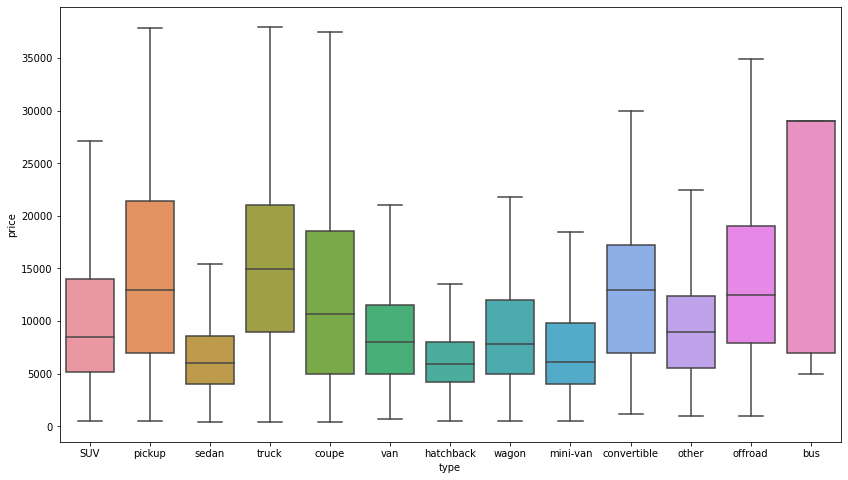

In [84]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x='type', y='price', data=data_clean_filtered,showfliers = False)

**Above are the price ranges of each vehicle type**

<AxesSubplot:xlabel='days_listed', ylabel='Count'>

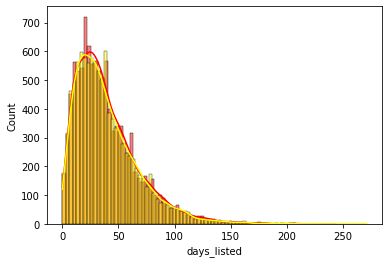

In [85]:
suv_data = data_clean_filtered.query('type == "SUV"')
sedan_data = data_clean_filtered.query('type == "sedan"')


sns.histplot(data=suv_data,x='days_listed',color='red',kde=True)
sns.histplot(data=sedan_data,x='days_listed',color='yellow',kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

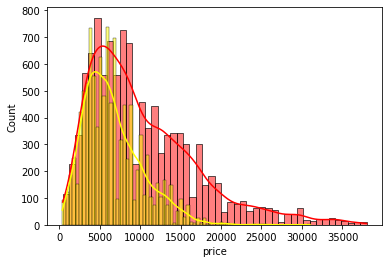

In [86]:
sns.histplot(data=suv_data,x='price',color='red',kde=True)
sns.histplot(data=sedan_data,x='price',color='yellow',kde=True)

**Summary of the section above**

      -The amount of Ads in the data of sedans and SUVs are quite similiar but their price is different in favor 
         to the SUV, which is more expensive.
         
         -Buses appear to be the mot expensive vehicle type but their amount among the ads is small compare to ethers types.
         
         -The cheapest vehicle type is hatchback that is fillowed by the sedan.
         
         -So, altrough sedans are 2nd from the end in price wise they are second from the top in the amount of ads.

## Price factors

In this section we analyze the price factors of the 2 most common vehicle types in our data.
we present a scater plot and a correlation data frame for each, regarding their numeric values,
and a box plot for the ctegorical values of each.

In [87]:
suv=data_clean_filtered[data_clean_filtered['type']=='SUV']
sedan=data_clean_filtered[data_clean_filtered['type']=='sedan']

suv_scatter= suv[['price','vehicle_condition','vehicle_age','mileage_full']]
sedan_scatter= sedan[['price','vehicle_condition','vehicle_age','mileage_full']]

## SUV Data:

    -This is SUV data:

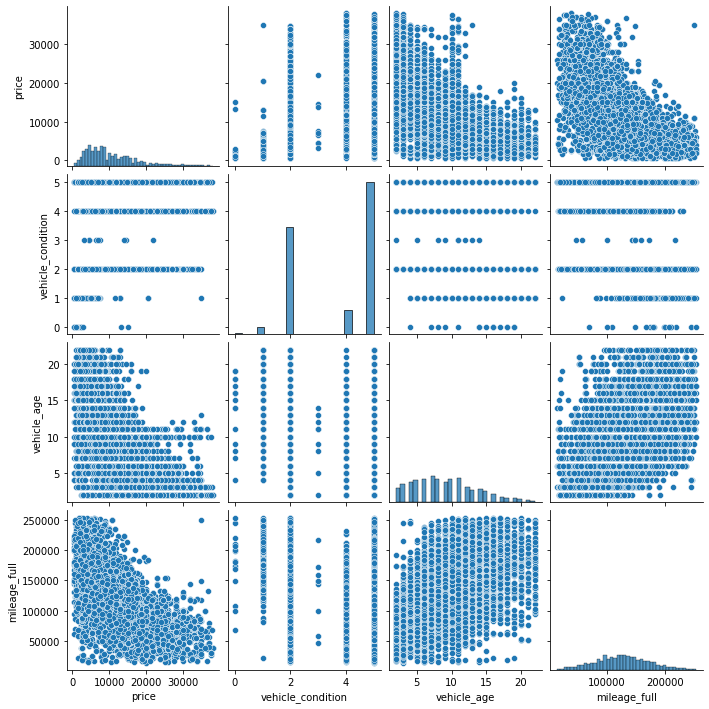

In [88]:
sns.pairplot(suv_scatter)


In [89]:
suv_scatter.corr()

,price,vehicle_condition,vehicle_age,mileage_full
price,1.000000,0.226903,-0.604690,-0.610305
vehicle_condition,0.226903,1.000000,-0.230488,-0.265768
vehicle_age,-0.604690,-0.230488,1.000000,0.601745
mileage_full,-0.610305,-0.265768,0.601745,1.000000


In the correlation data frame we see a clear correlation between the vehicle age and the mileage of an SUV.
the vehicle condition also has an effect on the price but its much lower.
What lowers the price of an SUV the most is whether its got a high mileage of if its old.

<AxesSubplot:xlabel='transmission', ylabel='price'>

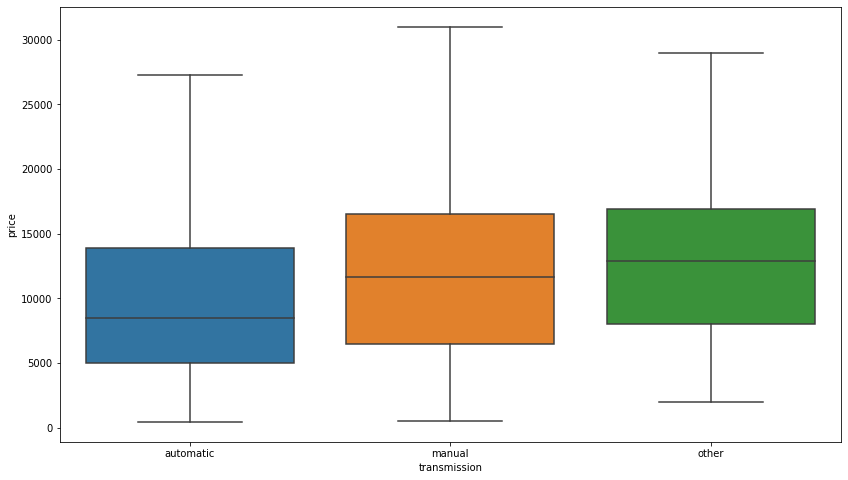

In [90]:
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=suv,showfliers = False)


Automatic geared SUVs are the cheapest in the data and the everything other than automatic or manual is considered the most expensive. Manual geared SUVs have the most price range, could be affected by other parameters. 

In [91]:
suv['paint_color'].value_counts()

unknown    1914
black      1844
white      1689
silver     1394
grey       1044
blue        923
red         805
green       369
brown       340
custom      262
orange       74
yellow       42
purple       35
Name: paint_color, dtype: int64

<AxesSubplot:xlabel='paint_color', ylabel='price'>

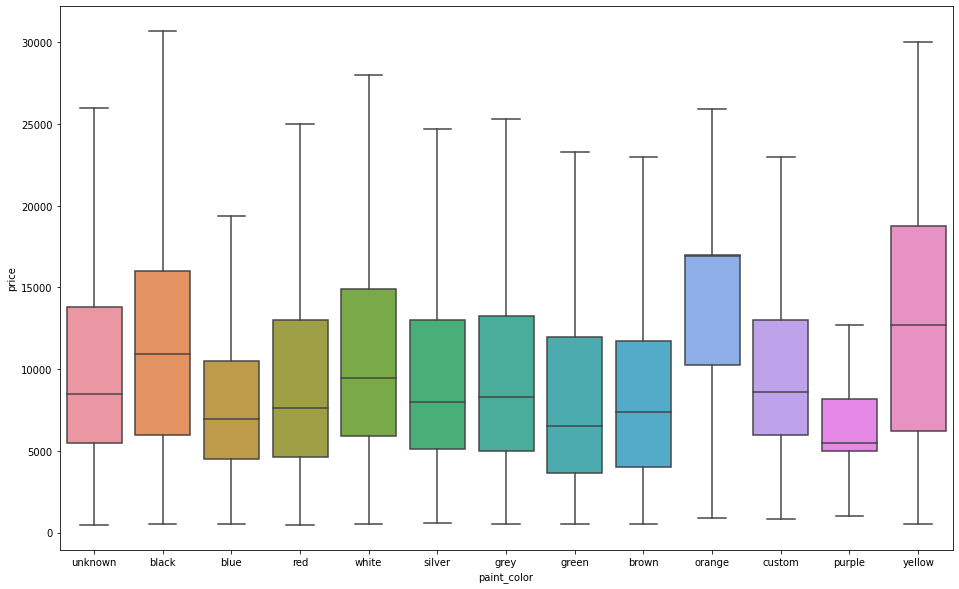

In [92]:
plt.figure(figsize=(16,10))
sns.boxplot(x="paint_color",y='price', data=suv,showfliers = False)

The price on an SUV stays in the same boundaries more or less where a brown SUV has the lowest price 
and orange SUVs(without regarding their big price differences) are the most expensive out of all possible colors in the data.
we cant account for any data that has less then 50 values so we cant include purple SUVs in our observations. 

## Sedan Data:

    -This is sedan data

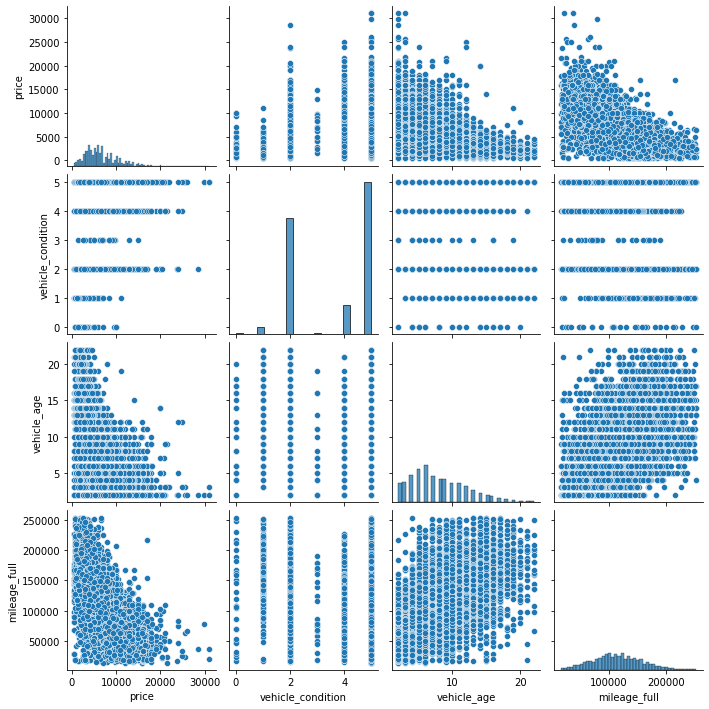

In [93]:
sns.pairplot(sedan_scatter)


In [94]:
sedan_scatter.corr()

,price,vehicle_condition,vehicle_age,mileage_full
price,1.000000,0.270403,-0.635213,-0.617762
vehicle_condition,0.270403,1.000000,-0.230056,-0.281811
vehicle_age,-0.635213,-0.230056,1.000000,0.580302
mileage_full,-0.617762,-0.281811,0.580302,1.000000


Once again, in the correlation data frame we see a clear correlation between the vehicle age and the mileage of a sedan.
the vehicle condition also has an effect on the price but its much lower.
What lowers the price of an SUV the most is whether its got a high mileage of if its old.

<AxesSubplot:xlabel='transmission', ylabel='price'>

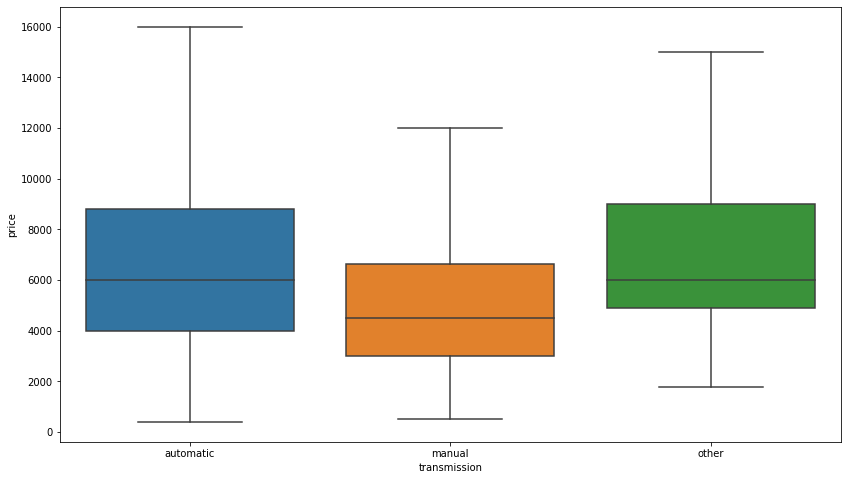

In [95]:
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=sedan,showfliers = False)

Automatic geared sedans have the biggest price range and are the most expensive vehicle in the graph. 
Everything other than automatic or manual is considered second biggest value, altrough the vareity seems to be avereged on the lower price range.
Manual geared sedans have the smallesr price range, this too could also be affected by other parameters. 

In [96]:
sedan['paint_color'].value_counts()

unknown    1910
silver     1831
black      1539
grey       1448
white      1275
blue       1096
red         823
custom      245
brown       240
green       191
purple       22
yellow       20
orange        7
Name: paint_color, dtype: int64

<AxesSubplot:xlabel='paint_color', ylabel='price'>

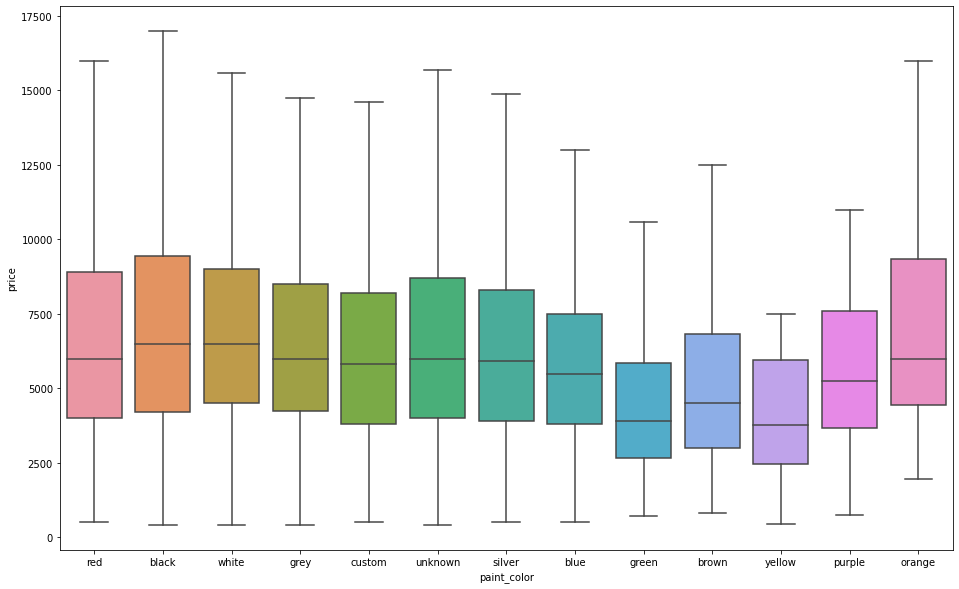

In [97]:
plt.figure(figsize=(16,10))
sns.boxplot(x='paint_color', y='price', data=sedan,showfliers = False)

The price on a sedan stays in the same boundaries more or less where a black sedan has the highest price avalability and a green sedan has the lowest price range.
here aswell, we cant account for categories that have less than 50 values in them so we cant consider yellow sedans in our observations 


## General conclusion


After analyzing the given data and proccesing it by covering its missing values, possible duplicates and establishing outliers. we formulated a clean data set with which we could begin our proccesing without worrying that some values could have effected the results in our conclutions.

- The conclutions we reached indicated that the most common vehicles that were up to sale were SUVs and sedans.

-  The parameters that affected the price of a vehicle the most were the total mileage and its age, the bigger these parameters are the lower the vehicle price is.

-  the parameter that affected the amount of days for the car to stay listed and avalible for buying is its age, the older the car is the harder it will be to sell it.